

# **Micrograd?**
Micrograd is a tiny Autograd which is automatic gradient. This implements backpropagation

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **What is a derivative??**
### How much does the function f(x) change with change in x(slope of the function)

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

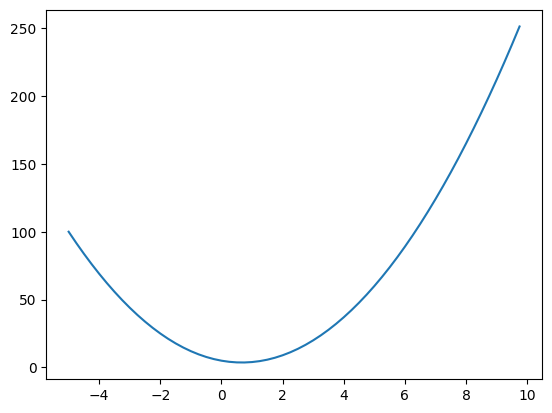

In [3]:
xs = np.arange(-5, 10, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [4]:
h = 0.0001
x = 3.0

# f(x)
print(f'f(x) = {f(x) : 4.4f}')

# f(x + h)
print(f'f(x + h) = {f(x + h) : 4.4f}')

# Change in value
diff = f(x + h) - f(x)
print(f'Difference = {diff : 4.4f}')

# Slope of the function
slope = diff / h
print(f'Slope = {slope : 4.4f}')

f(x) =  20.0000
f(x + h) =  20.0014
Difference =  0.0014
Slope =  14.0003




```
# This is formatted as code
```

### CASE 2 : If h is soooo small then

In [5]:
h = 0.000000001
x = 3.0

# f(x)
print(f'f(x) = {f(x) : 4.4f}')

# f(x + h)
print(f'f(x + h) = {f(x + h) : 4.4f}')

# Change in value
diff = f(x + h) - f(x)
print(f'Difference = {diff : 4.4f}')

# Slope of the function
slope = diff / h
print(f'Slope = {slope : 4.4f}')

f(x) =  20.0000
f(x + h) =  20.0000
Difference =  0.0000
Slope =  14.0000


### CASE 3 : If x = -3, the slope reverses





In [6]:
h = 0.0001
x = -3.0

# f(x)
print(f'f(x) = {f(x) : 4.4f}')

# f(x + h)
print(f'f(x + h) = {f(x + h) : 4.4f}')

# Change in value
diff = f(x + h) - f(x)
print(f'Difference = {diff : 4.4f}')

# Slope of the function
slope = diff / h
print(f'Slope = {slope : 4.4f}')

f(x) =  44.0000
f(x + h) =  43.9978
Difference = -0.0022
Slope = -21.9997


### CASE 4 : If x = 2/3, the slope becomes zero

In [7]:
h = 0.0001
x = 2/3

# f(x)
print(f'f(x) = {f(x) : 4.4f}')

# f(x + h)
print(f'f(x + h) = {f(x + h) : 4.4f}')

# Change in value
diff = f(x + h) - f(x)
print(f'Difference = {diff : 4.4f}')

# Slope of the function
slope = diff / h
print(f'Slope = {slope : 4.4f}')

f(x) =  3.6667
f(x + h) =  3.6667
Difference =  0.0000
Slope =  0.0003


In [8]:
## Now for some little complex problem

a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [9]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c
print('d1 = ', d1)
print('d2 = ', d2)
print('slope(der a/der d1) = ', (d2 - d1) / h)

d1 =  4.0
d2 =  3.999699999999999
slope(der a/der d1) =  -3.000000000010772


#### We know from calculus that da/dd1 for ab + c is b, which is -3 here, hence we can prove it as well



In [10]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
b += h
d2 = a * b + c
print('d1 = ', d1)
print('d2 = ', d2)
print('slope(der a/der d1) = ', (d2 - d1) / h)

d1 =  4.0
d2 =  4.0002
slope(der a/der d1) =  2.0000000000042206


#### Again, We know from calculus that db/dd1 for ab + c is a, which is +2 here, hence we can prove it as well


In [11]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c
print('d1 = ', d1)
print('d2 = ', d2)
print('slope(der a/der d1) = ', (d2 - d1) / h)

d1 =  4.0
d2 =  4.0001
slope(der a/der d1) =  0.9999999999976694


#### Again, We know from calculus that dc/dd1 for ab + c is 1,hence we prove it as well


## **Moving into Micrograd**

In [12]:
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f'Value(data = {self.data})'

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data)
    return out


In [13]:
a = Value(a)
print(a)

Value(data = 2.0)


In [14]:
a = Value(2.0)
b = Value(-3.0)

a + b

Value(data = -1.0)

In [15]:
a = Value(2.0)
b = Value(-3.0)

a * b

Value(data = -6.0)

In [16]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

a * b + c


Value(data = 4.0)

## Part 2

In [17]:
class Value:
  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f'Value(data = {self.data})'

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

In [18]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
d = a * b ; d.label = 'd'
e = d + c ; e.label = 'e'

print(f'd_prev = {d._prev}')
print(f'd_op = {d._op}')

d_prev = {Value(data = 2.0), Value(data = -3.0)}
d_op = *


## To Visualise the code

In [19]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data,), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

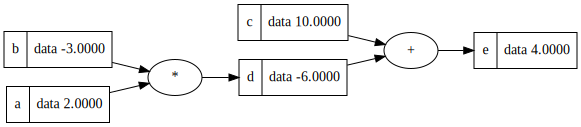

In [20]:
draw_dot(e)

### **Forward Pass**

In [21]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
d = a * b ; d.label = 'd'
e = d + c ; e.label = 'e'
f = Value(-2.0, label = 'f')
L = e * f ; L.label = 'L'

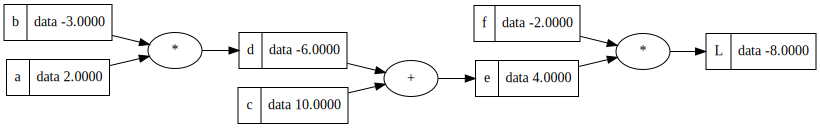

In [22]:
draw_dot(L)

### **Backpropagation**

Derivative of the loss function wrt the leaf nodes

In [23]:
class Value:
  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0

  def __repr__(self):
    return f'Value(data = {self.data})'

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

In [24]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [25]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
d = a * b ; d.label = 'd'
e = d + c ; e.label = 'e'
f = Value(-2.0, label = 'f')
L = e * f ; L.label = 'L'

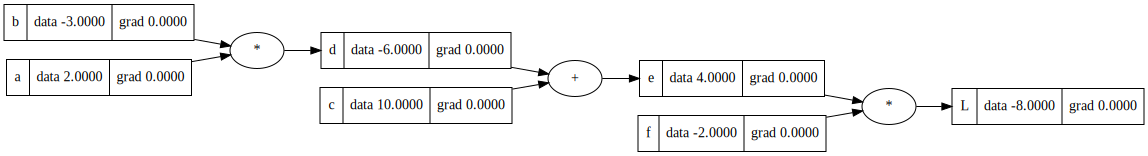

In [26]:
draw_dot(L)



```
dL/ dL = 1.0
```



```
dL/de
=> L = f * e
=> Der (f*e) wrt Der e
= f
```

```
dL/df
=> L = f * e
=> Der (f*e) wrt Der e
= e
```
```
de/dc
=> e = c + f
=> Der (c + f) wrt Der c
= 1.0

Proof:
= f(f + (c+h)) - f(c + f) / h
= f + c + h - c + f / h
= h/h
= 1.0
```

```
dL / dc
=> dL/de * de/dc ( By Chain rule)
=> f * 1
=> f
```

```
dL / dd
=> dL/de * de/dd ( By Chain rule)
=> f * 1
=> f
```

```
dd / db
=> Der (a*b) wrt Der b
=> a
```

```
dd / da
=> Der (a*b) wrt Der a
=> b
```

```
dL / db
=> dL/de * de/dd * dd/db ( By Chain rule)
=> f * 1 * a
=> f * a
```

```
dL / da
=> dL/de * de/dd * dd/da ( By Chain rule)
=> f * 1 * b
=> f * b
```



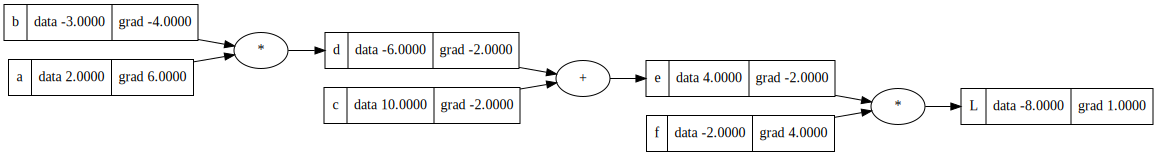

In [27]:
L.grad = 1.0
e.grad = f.data
f.grad = e.data
c.grad = f.data * 1.0
d.grad = f.data * 1.0
a.grad = f.data * 1.0 * b.data
b.grad = f.data * 1.0 * a.data
draw_dot(L)

Backprop : Recursively application of chainrule backwards in a computational graph

-7.286496


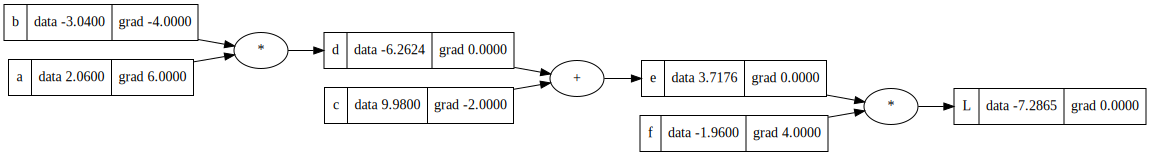

In [28]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

d = a * b; d.label = 'd'
e = d + c; e.label = 'e'
L = e * f; L.label = 'L'


print(L.data)
draw_dot(L)

# **Now micrograd for a small neural network**

![General Scheme of an Artificial Neural Network](https://www.researchgate.net/publication/352338692/figure/fig12/AS:1037132248403970@1624283005647/General-scheme-of-an-artificial-neural-network-ANN.png)


> Add blockquote



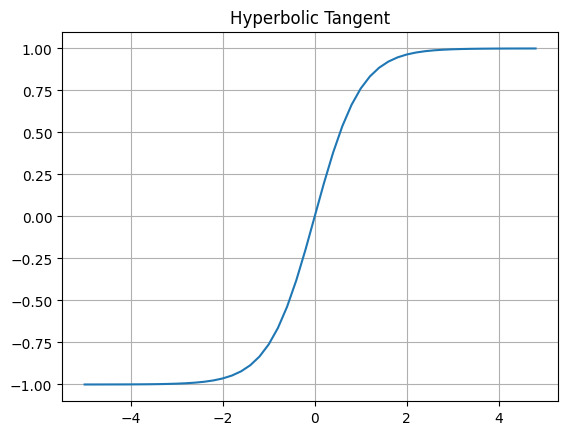

In [29]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()
plt.title('Hyperbolic Tangent')
plt.show()

In [30]:
class Value:
  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0

  def __repr__(self):
    return f'Value(data = {self.data})'

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

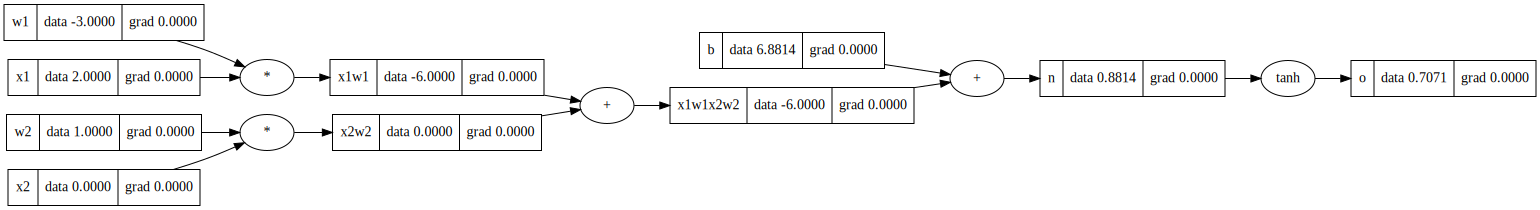

In [31]:
# Inputs x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# Weights w1 and w2 and Bias b
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.8813735870195432, label = 'b')

# x1w1 and x2w2
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

# Summation and their bias
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'

# Output layer with tanh activation function
o = n.tanh(); o.label = 'o'

draw_dot(o)



```
do / do = 1.0
```





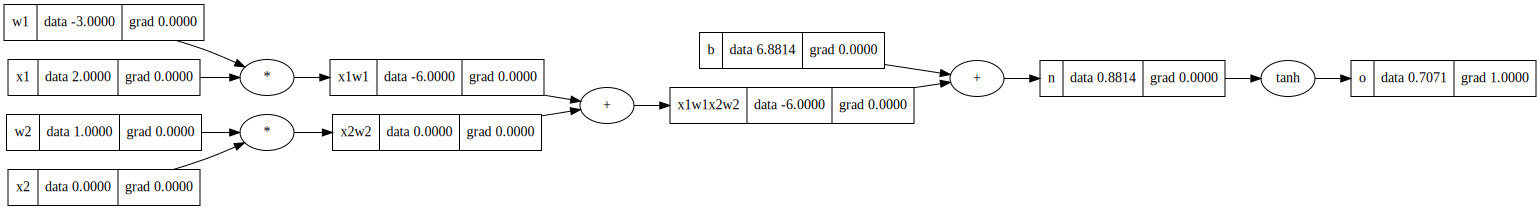

In [32]:
o.grad = 1.0

draw_dot(o)



```
do / dn
=> Der(tanh(n)) / Der n
=> 1 - tanh^2(n)
=> 1 - o ^ 2
=> 0.499999999999
~= 0.5
```


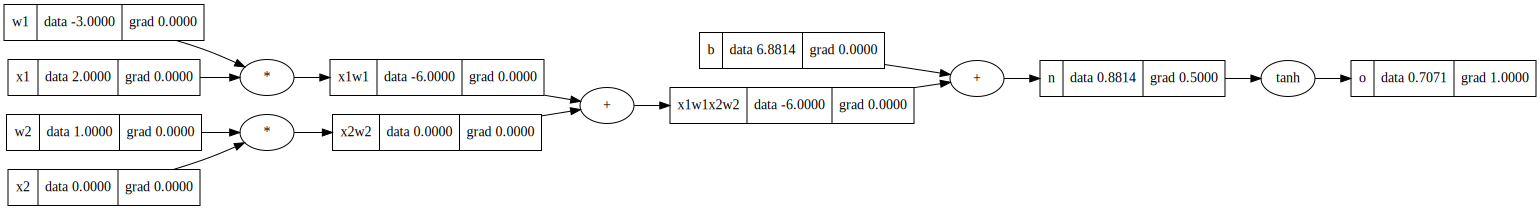

In [33]:
n.grad = 0.5

draw_dot(o)


```
do / dx1w1x2w2
=> (do / dn) * (dn / dx1w1x2w2)
=> 0.5 * 1.0 (As we already seen that the '+' just mediates the gradient)
=> 0.5
```

```
do / db
=> (do / dn) * (dn / db)
=> 0.5 * 1.0 (As we already seen that the '+' just mediates the gradient)
=> 0.5
```


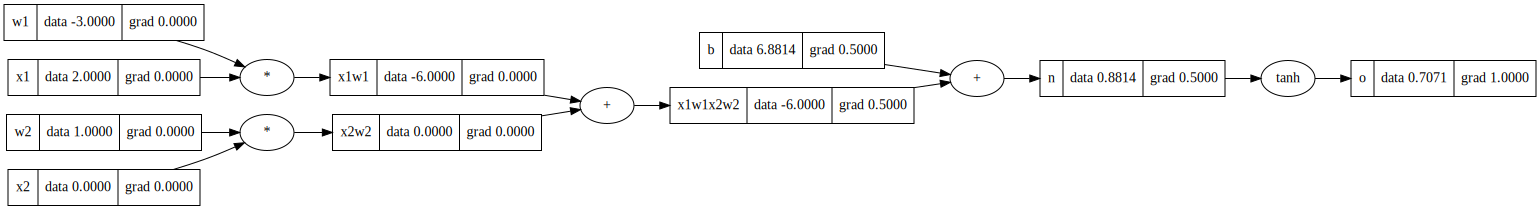

In [34]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

draw_dot(o)


```
do / dx2w2
=> (do / dn) * (dn / dx1w1x2w2) * (dx1w1x2w2 / dx2w2)
=> 0.5 * 1.0 * 1.0 (As we already seen that the '+' just mediates the gradient)
=> 0.5
```
```
do / dx1w1
=> (do / dn) * (dn / dx1w1x2w2) * (dx1w1x2w2 / dx1w1)
=> 0.5 * 1.0 * 1.0 (As we already seen that the '+' just mediates the gradient)
=> 0.5
```



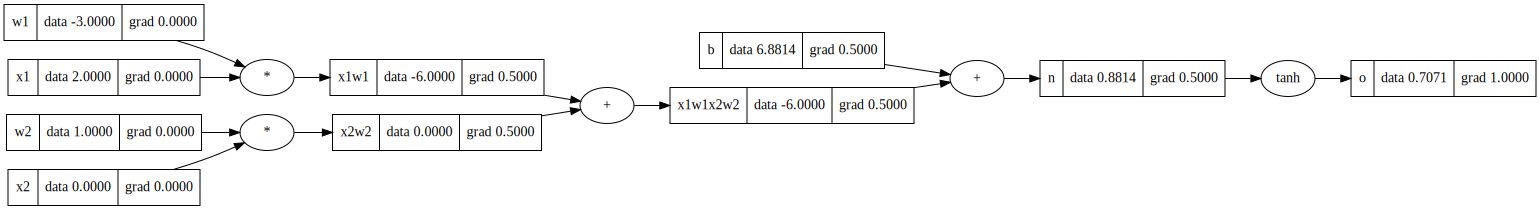

In [35]:
x2w2.grad = 0.5
x1w1.grad = 0.5

draw_dot(o)

```
do / dx2
=> (do / dn) * (dn / dx1w1x2w2) * (dx1w1x2w2 / dx2w2) * (dx2w2 / dx2)
=> 0.5 * 1.0 * 1.0 * w2
=> 0.5 * w2
```
```
do / dw2
=> (do / dn) * (dn / dx1w1x2w2) * (dx1w1x2w2 / dx2w2) * (dx2w2 / dw2)
=> 0.5 * 1.0 * 1.0 * x2
=> 0.5 * x2
```
```
do / dx1
=> (do / dn) * (dn / dx1w1x2w2) * (dx1w1x2w2 / dx1w1) * (dx1w1 / dx1)
=> 0.5 * 1.0 * 1.0 * w1
=> 0.5 * w1
```
```
do / dw1
=> (do / dn) * (dn / dx1w1x2w2) * (dx1w1x2w2 / dx1w1) * (dx1w1 / dw1)
=> 0.5 * 1.0 * 1.0 * x1
=> 0.5 * x1
```


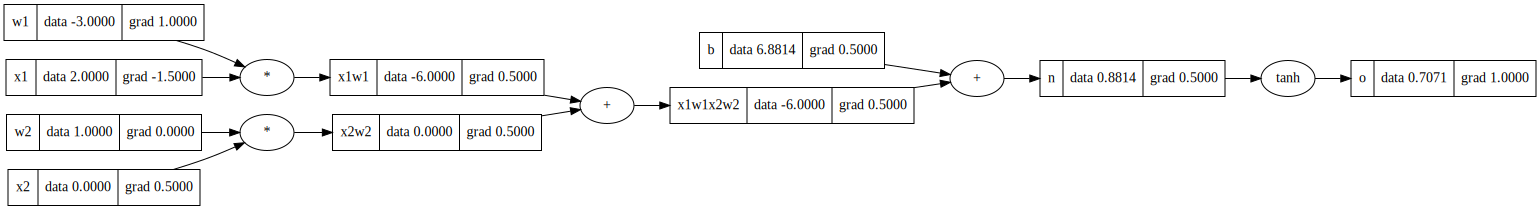

In [36]:
x2.grad = 0.5 * w2.data
# x2.grad = x2w2.grad * w2.data
w2.grad = 0.5 * x2.data
# x2.grad = x2w2.grad * x2.data


x1.grad = 0.5 * w1.data
# x1.grad = x1w1.grad * w1.data
w1.grad = 0.5 * x1.data
# x1.grad = x1w1.grad * x1.data


draw_dot(o)

# **Let us now implement the backpropagation in a automated way**

In [37]:
class Value:
  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0
    self._backward = lambda: None

  def __repr__(self):
    return f'Value(data = {self.data})'

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      '''
      Since it is a '+' operation,
      the grad = local_grad * global_grad
               = 1.0 * out.grad
      '''
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad

    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      '''
      Since it is a '*' operation,
      The grad is local_grad * global_grad

      local_grad :-
      the grad for self.data * others.data wrt self.data
               = others.data
      the grad for self.data * others.data wrt others.data
               = self.data

      global_grad :-
              = out.grad

      '''
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad

    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      '''
      The derivative of the tanh function is
      1 - tanh^2(x)
      '''
      self.grad = (1 - (t ** 2)) * out.grad

    out._backward = _backward
    return out

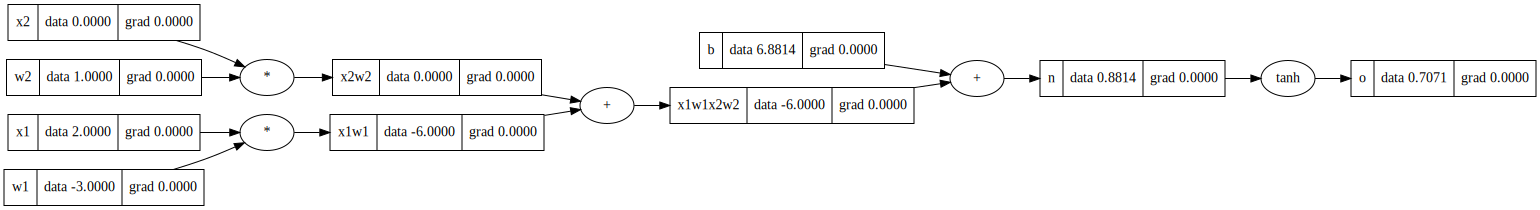

In [38]:
# Inputs x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# Weights w1 and w2 and Bias b
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.8813735870195432, label = 'b')

# x1w1 and x2w2
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

# Summation and their bias
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'

# Output layer with tanh activation function
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [39]:
o.grad = 1.0
o._backward()

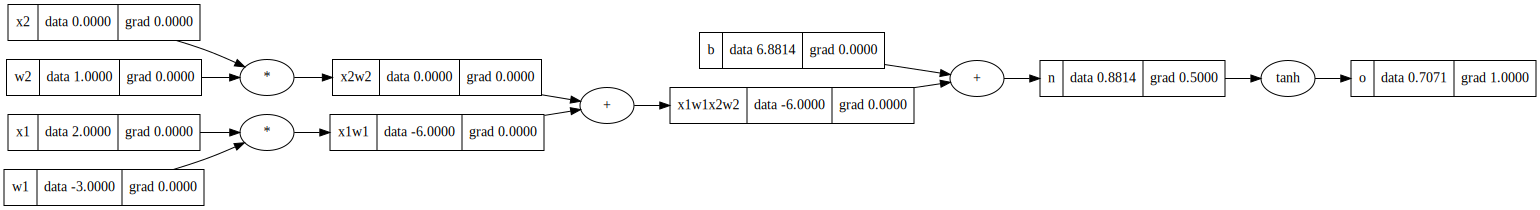

In [40]:
draw_dot(o)

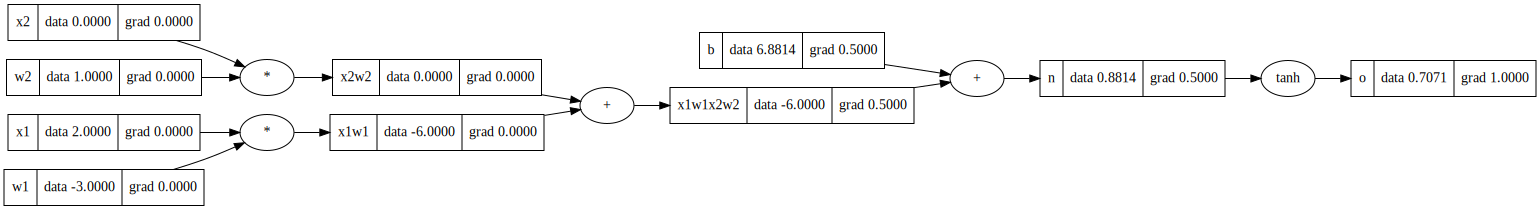

In [41]:
n._backward()
draw_dot(o)

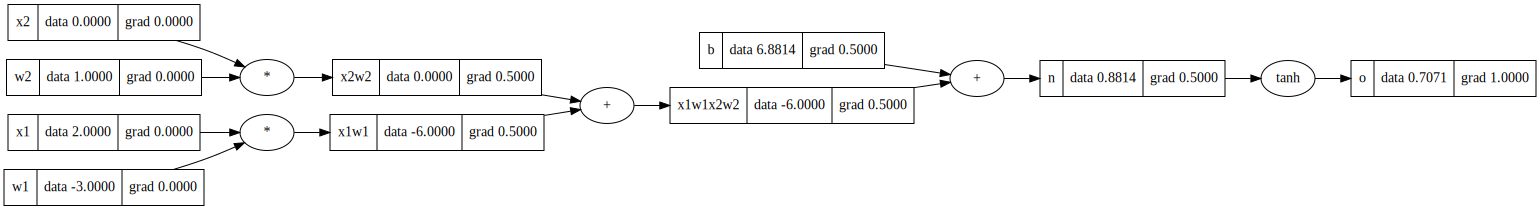

In [42]:
x1w1x2w2._backward()
b._backward()

draw_dot(o)

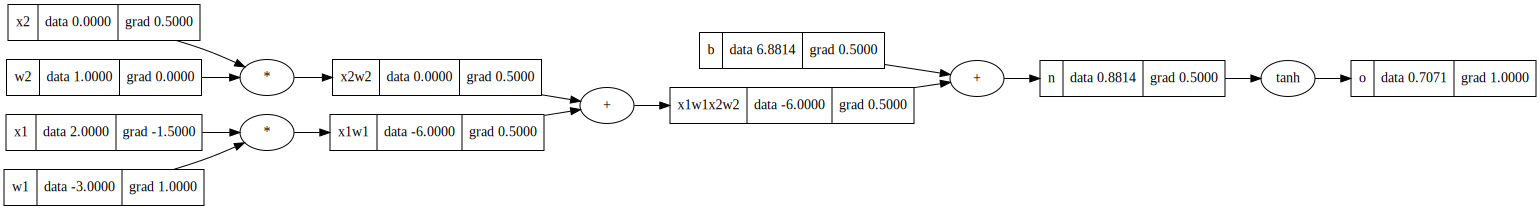

In [43]:
x2w2._backward()
x1w1._backward()

draw_dot(o)

# **Toplogical sort**

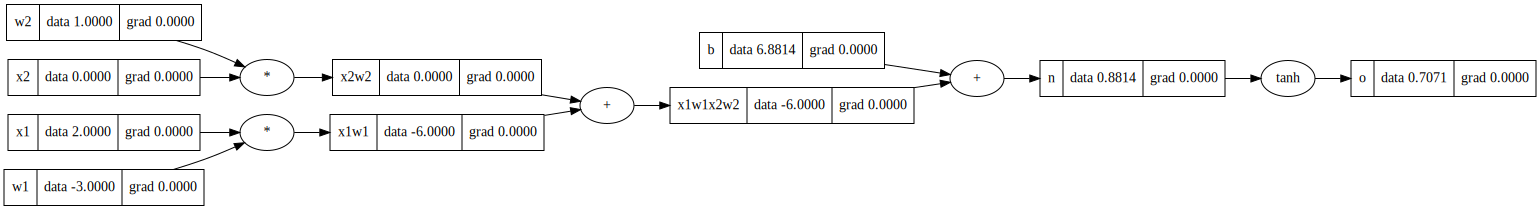

In [44]:
# Inputs x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# Weights w1 and w2 and Bias b
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.8813735870195432, label = 'b')

# x1w1 and x2w2
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

# Summation and their bias
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'

# Output layer with tanh activation function
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [45]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)

topo

[Value(data = 1.0),
 Value(data = 0.0),
 Value(data = 0.0),
 Value(data = 2.0),
 Value(data = -3.0),
 Value(data = -6.0),
 Value(data = -6.0),
 Value(data = 6.881373587019543),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]

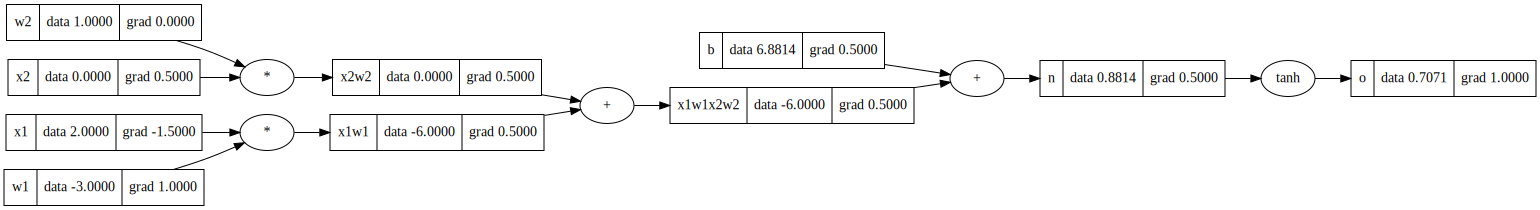

In [46]:
o.grad = 1.0
for node in reversed(topo):
  node._backward()

draw_dot(o)

## Let's put it in the main function

In [47]:
class Value:
  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0
    self._backward = lambda: None

  def __repr__(self):
    return f'Value(data = {self.data})'

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad

    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad

    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad = (1 - (t ** 2)) * out.grad

    out._backward = _backward
    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

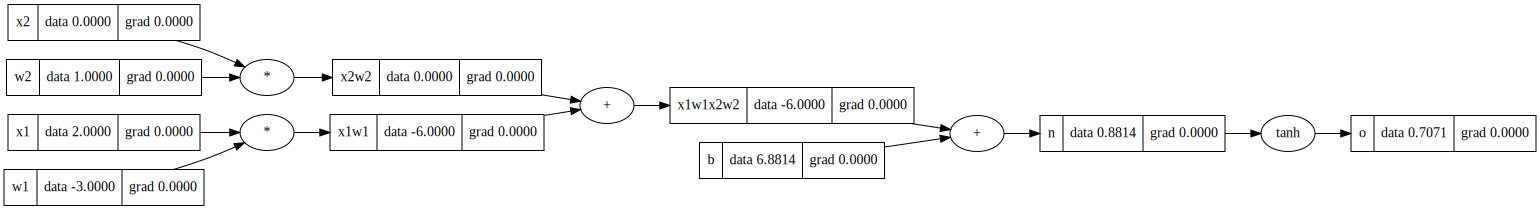

In [48]:
# Inputs x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# Weights w1 and w2 and Bias b
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.8813735870195432, label = 'b')

# x1w1 and x2w2
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

# Summation and their bias
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'

# Output layer with tanh activation function
o = n.tanh(); o.label = 'o'

draw_dot(o)

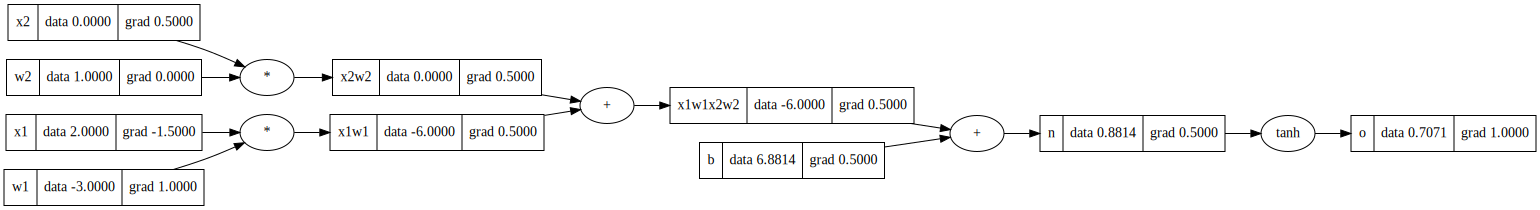

In [49]:
o.backward()

draw_dot(o)

# **PART - 1 ----- --- -- ------- --- ---- ----**